# Lineare Regression

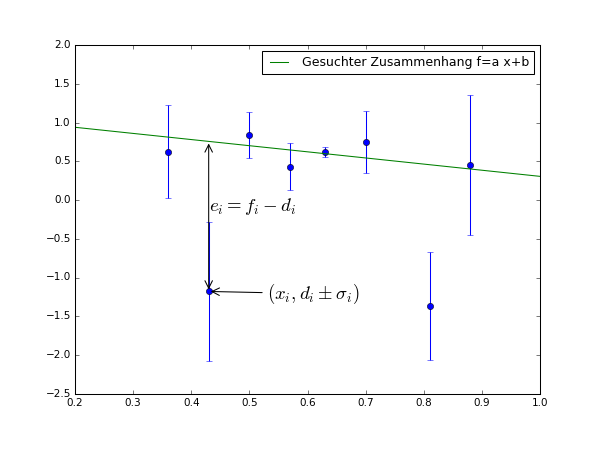

In [5]:
from IPython.display import Image 
Image(filename=('Linreg_Beispiel.png'))

## Problemstellung:

Für gegebene Daten $d_i\pm \sigma_i$ an den Stellen $x_i$ $(i=1 .. N)$ ist die lineare Funktion $f$ ("Ausgleichsgerade") 

$$f=a x +b$$ 

zu bestimmen, die die Daten "möglichst gut" repräsentiert. Dabei soll die Kenntnis über die Fehler berücksichtigt werden, d.h. "schlechtere" Daten weniger berücksichtigt werden.

Der Fehler $e_i$ für die einzelnen Datenpunkte $d_i$ ist gegeben durch die Abweichung zur Modellgeraden

$$e_i=f_i-d_i$$

Es liegt ein überbestimmtes Gleichungssystem vor mit den zwei unbekannten Parametern $a$ und $b$ und $N>2$ bekannten Variablen.

## Formalisierung des Problems (Least-Squares Methode):

Die Methode der *Summe der quadratischen Abweichungen* (*Least-Squares-Methode*) ist eine mathematische [Optimierung](https://de.wikipedia.org/wiki/Optimierung_%28Mathematik%29). Bei einer Optimierung geht es um das Finden von Minima oder Maxima von *Zielfunktionen*. Die Zielfunktion wird auch als *Fehlerfunktion* oder *Kostenfunktion* bezeichnet.

Die *Güte* eines Fits (die *Fehlerfunktion F*) ergibt sich aus der Summe der quadratischen Abweichungen zwischen den Daten und der zu optimierenden Funktion

$$
F(a,b)=\sum_{i=1}^{N} \frac{e_i^2}{\sigma_i^2}
$$

### Ziel 

Gesucht sind die speziellen Parameter $\hat{a},\hat{b}$ für die die Fehlerfunktion $F(\hat{a},\hat{b})$ minimal wird. Diese gesuchten Parameter führen zu einer *optimalen* Anpassung an die Daten. 

### Methode 

Im Minimum von $F$ muss gelten:
$$
\frac{\partial F}{\partial a}=0
$$

$$
\frac{\partial F}{\partial b}=0
$$

$$
F(a,b)=\sum_{i=1}^{N} \frac{e_i^2}{\sigma_i^2}=\sum_{i=1}^{N} \frac{(ax_i+b-d_i)^2 }{\sigma_i^2}\\
=\sum_{i=1}^{N} \frac{1}{\sigma_i^2} ( a^2 x_i^2 + 2 a b x_i - 2 a d_i x_i + b^2 - 2 b d_i + d_i^2 )
$$


### Bestimmungsgleichungen für Minimum der quadratischen Abweichung (optimaler Fit)
Aus den Ableitungen folgen die Gleichungen für die Bestimmung der optimalen Ausgleichsgeraden $f=\hat{a} x + \hat{b}$  

$$
\frac{\partial F}{\partial a}=0=\underbrace{(\sum_{i=1}^{N} \frac{x_i^2 }{\sigma_i^2})}_{\alpha} \hat{a} + \underbrace{(\sum_{i=1}^{N} \frac{x_i }{\sigma_i^2})}_{\beta} \hat{b} - \underbrace{(\sum_{i=1}^{N} \frac{x_i d_i }{\sigma_i^2})}_{\gamma}  
$$


$$
\frac{\partial F}{\partial b}=0=\underbrace{(\sum_{i=1}^{N} \frac{x_i }{\sigma_i^2})}_{\beta} \hat{a} + \underbrace{(\sum_{i=1}^{N} \frac{1 }{\sigma_i^2})}_{\epsilon} \hat{b} - \underbrace{(\sum_{i=1}^{N} \frac{d_i }{\sigma_i^2})}_{\delta}
$$

Vereinfachen wir mit  $\alpha=\sum \frac{x_i^2 }{\sigma_i^2}$, $\beta=\sum \frac{x_i }{\sigma_i^2}$, $\gamma=\sum \frac{x_i d_i }{\sigma_i^2}$, $\delta=\sum \frac{d_i }{\sigma_i^2}$ und $\epsilon=\sum \frac{1 }{\sigma_i^2}$, so folgt


$$
\alpha \hat{a}  + \beta \hat{b} = \gamma
$$


$$
\beta \hat{a}  + \epsilon \hat{b} = \delta
$$

Durch Umformen und Einsetzen erhalten wir die Berechnungsformeln für $\hat{a}$ und $\hat{b}$


$$
\hat{b} = \frac{ \alpha \delta - \beta \gamma }{ \alpha \epsilon - \beta^2 }
$$

$$
\hat{a} = \frac{  \gamma - \beta \hat{b} }{ \alpha } 
$$



# Aufgabe lineare Regression

Gegeben sind die folgenden Datenpunkte $d_i\pm \sigma_i$ an den Stellen $x_i$ $(i=1 .. 8)$

Programmieren Sie eine Funktion *ausgleichsgerade(x,d,sigma)*, welche die Regressionsparameter $\hat{a}$ und $\hat{b}$  berechnet.

In [2]:
%pylab inline
from ausgleichsgerade import ausgleichsgerade

# Zufällige Beispieldaten
x=array([ 0.63,  0.81,  0.36,  0.43,  0.70, 0.57 ,  0.50,  0.88])
d=array([ 0.62, -1.37,  0.62, -1.18,  0.75, 0.43 ,  0.84,  0.45])
sigma=array([0.06,  0.7,  0.6,  0.9,  0.4, 0.3,  0.3 ,  0.9])

# Diese Funktion gilt es zu programmieren
a,b=ausgleichsgerade(x,d,sigma)

# Erzeuge neue X und Y Werte zum Plotten der Ausgleichsgerade
X=linspace(0.2,1)
Y=a*X+b

# Graphische Ausgabe, siehe oben
figure(figsize=(8,6))
errorbar(x,d,yerr=sigma,fmt='o')
plot(X,a*X+b,'g-',label='Gesuchter Zusammenhang f=a x+b')
i=3
annotate('$(x_i,d_i\pm \sigma_i)$',xy=(x[i], d[i]), \
         arrowprops=dict(arrowstyle='->'), xytext=(x[i]+0.1, d[i]-0.1),fontsize=18)
annotate('',xy=(x[i], d[i]), arrowprops=dict(arrowstyle='<->'), \
         xytext=(x[i], x[i]*a+b),fontsize=18)
text(x[i], x[i]*a+b-sigma[i],'$e_i=f_i-d_i$',fontsize=18)
axis([0.2,1.0,-2.5,2.0])
legend()
savefig('Linreg_Beispiel.png',dpi=75) # Speichern als Bild
close()

Populating the interactive namespace from numpy and matplotlib


## Lösungshilfe Python

Ergänzen Sie die fehlenden Berechnungsvorschriften ...

In [12]:
%%file ausgleichsgerade.py
from numpy import sum

def ausgleichsgerade(x,d,s):
    """Berechne die Ausgleichsgerade f = a * x + b fuer Datenpunkte, die durch die Vektoren 
        x_i, d_i +- s_i gegeben sind.

        Eingabe: 
            x X-Achsenabschnitt
            d Y-Achsenabschnitt
            s Fehler
        Ausgabe:
            a_fit, b_fit
    """
    alpha=sum(x**2/s**2)
    ...
    ...
    b_fit=...
    a_fit=...
    return a_fit, b_fit

## Lösungshilfe Matlab/Octave

In [3]:
x=[ 0.63,  0.81,  0.36,  0.43,  0.70, 0.57 ,  0.50,  0.88];
d=[ 0.62, -1.37,  0.62, -1.18,  0.75, 0.43 ,  0.84,  0.45];
sigma=[0.06,  0.7,  0.6,  0.9,  0.4, 0.3,  0.3 ,  0.9];

In [16]:
%%file ausgleichsgerade.m

function [a_fit, b_fit]=ausgleichsgerade(x,d,s)
    alpha=sum(x.^2./s.^2);
    ...
end


Created file '/home/lars/sync/Zeitserien/Zeitreihenanalyse/stunde3/ausgleichsgerade.m'.


In [21]:
[a,b]=ausgleichsgerade(x,d,sigma)

a = -0.79157
b =  1.0966


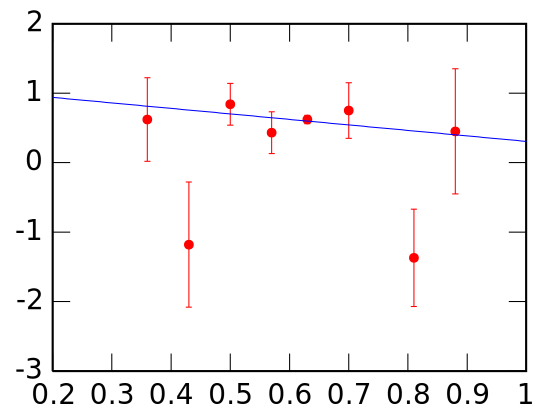

In [28]:
X=linspace(0.2,1);
Y=a*X+b;

errorbar(x,d,sigma,".r")
hold()
plot(X,a*X+b)